## Import and Define global variables

In [1]:
import os
import cv2
import numpy as np

from utils.dataloader import DataLoader
from utils.transforms import Composer, HairRemoval, KMeansSegmentation
from utils.vis import MatplotlibVisualizer

In [2]:
## Work folfer
work_folder = os.getcwd()
data_folder = os.path.join(work_folder, '..', 'Data/Challenge1')

## Visualizer
matplotlib_visualizer = MatplotlibVisualizer()

## Data Loader

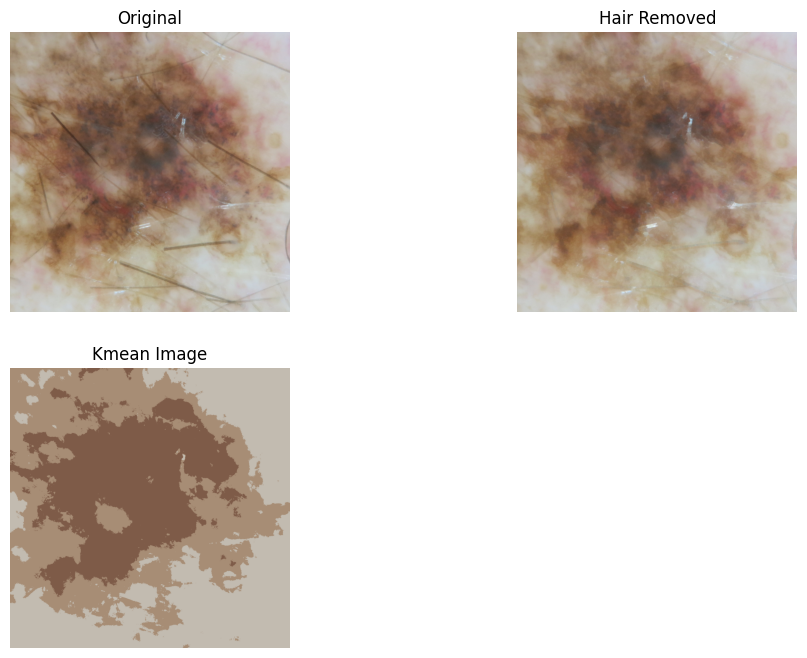

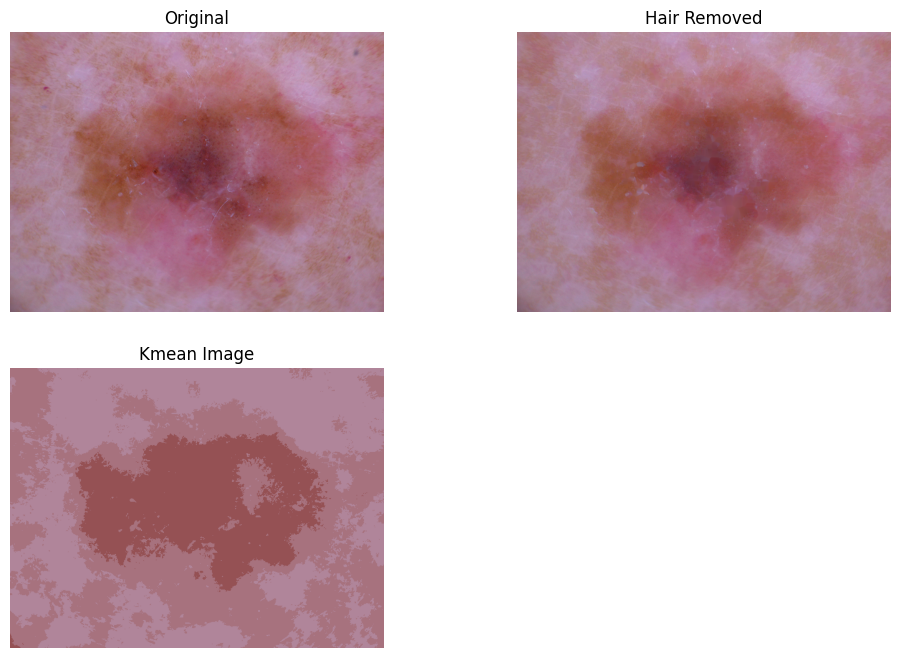

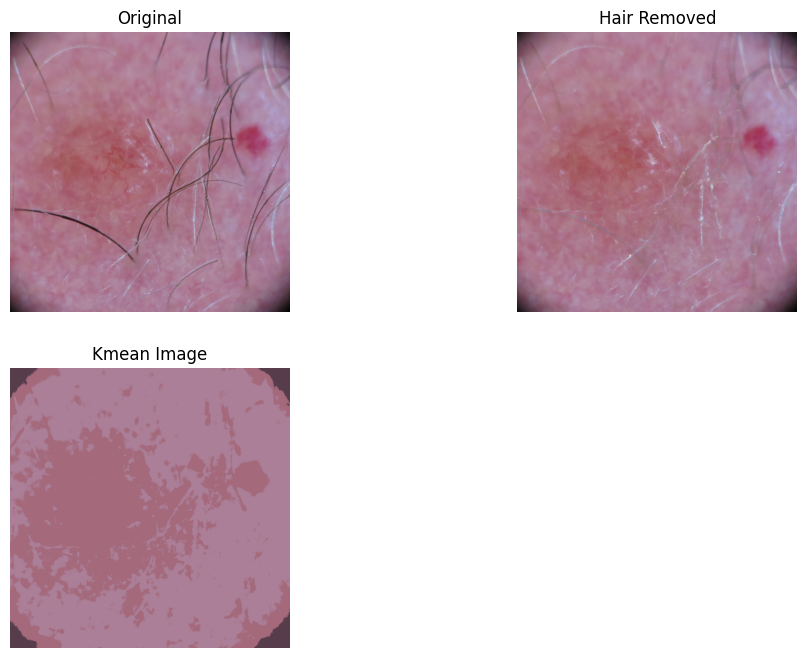

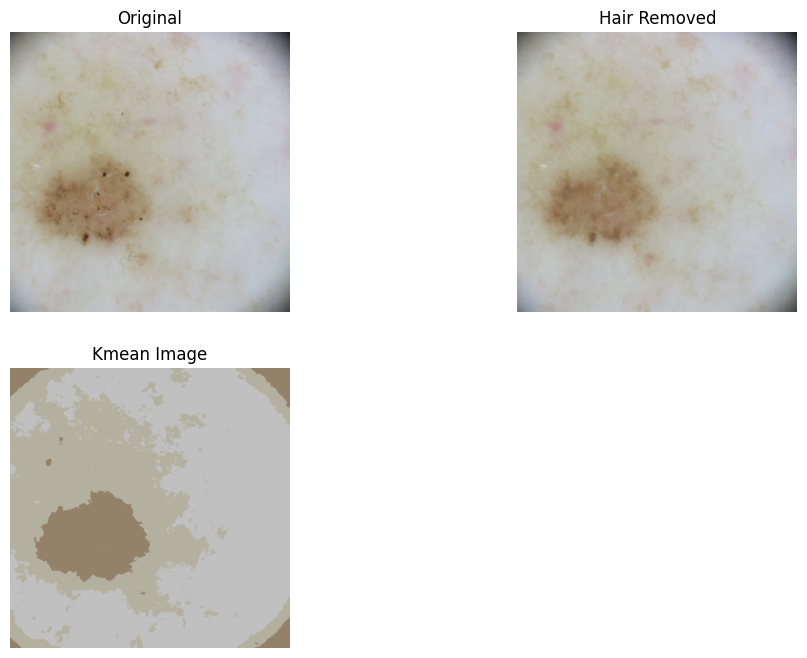

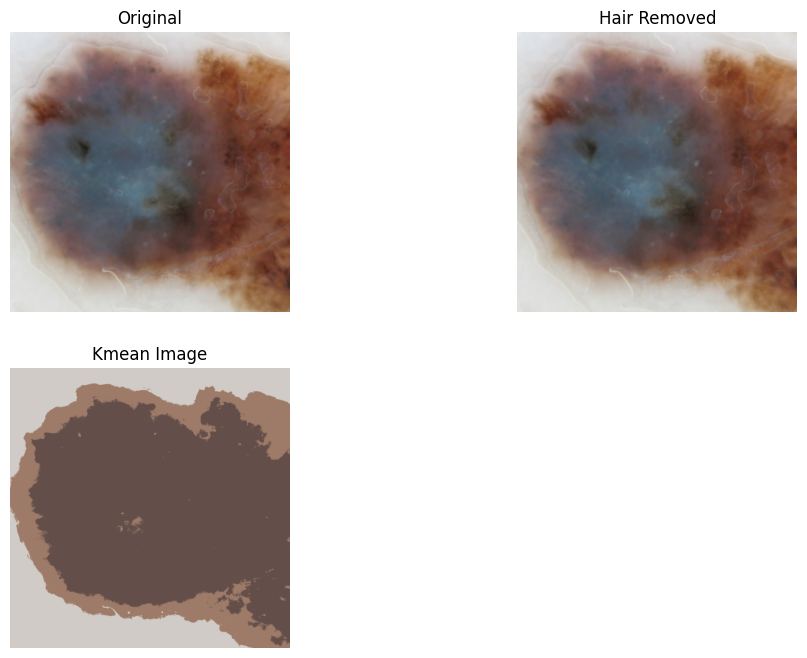

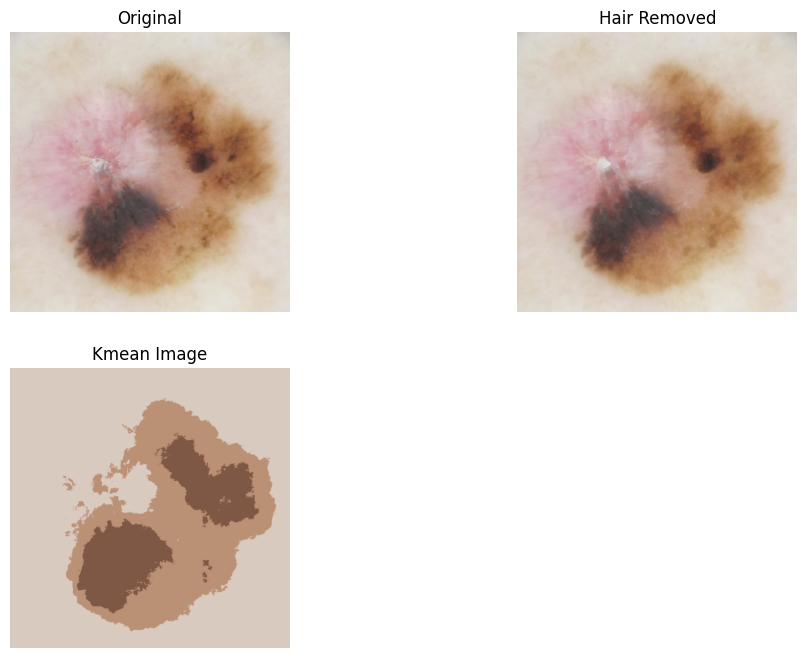

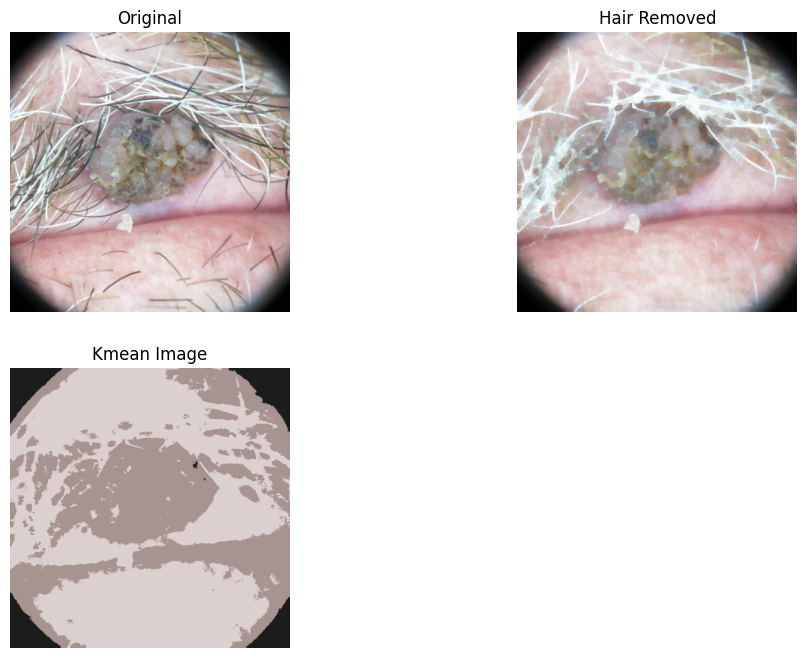

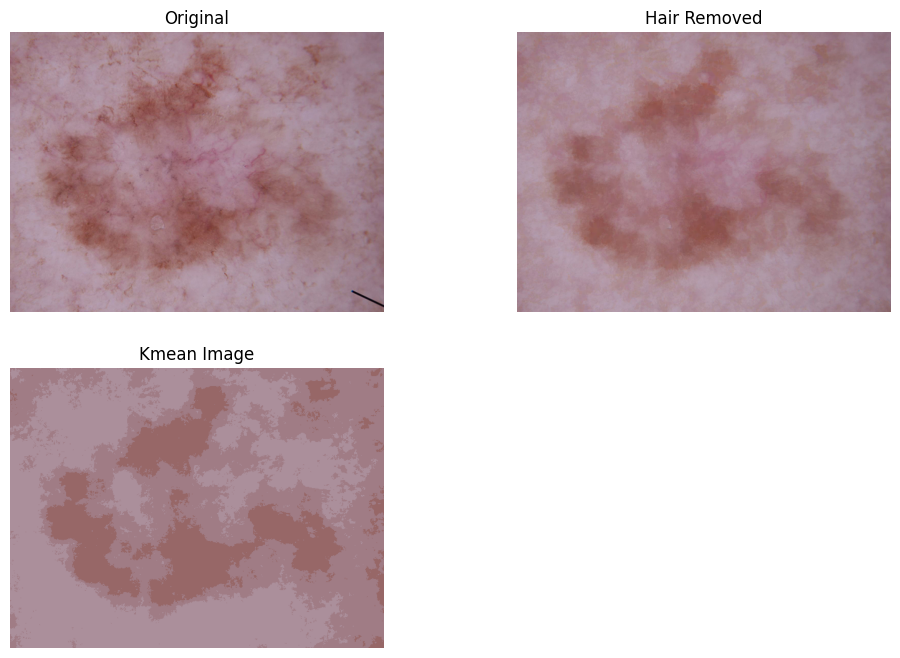

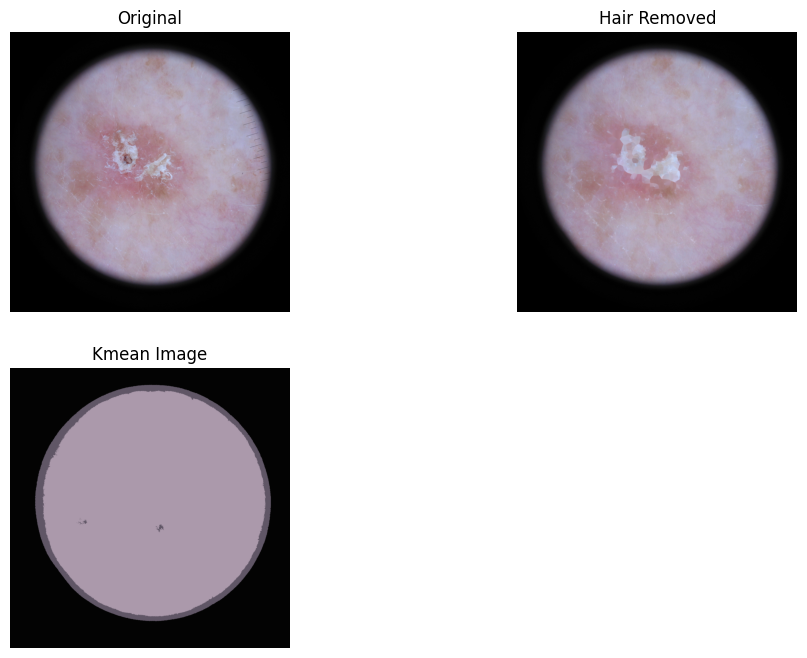

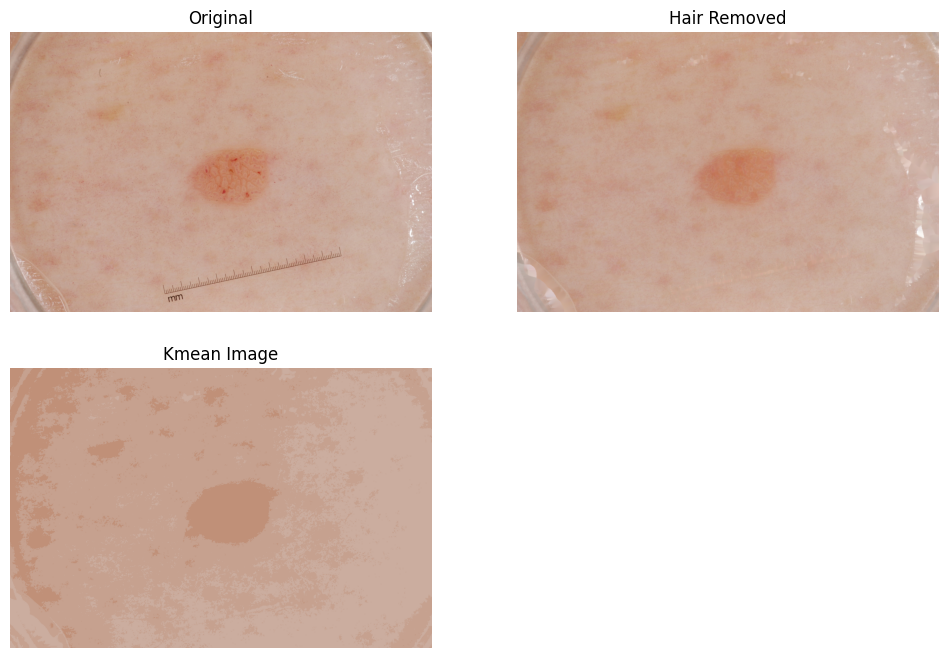

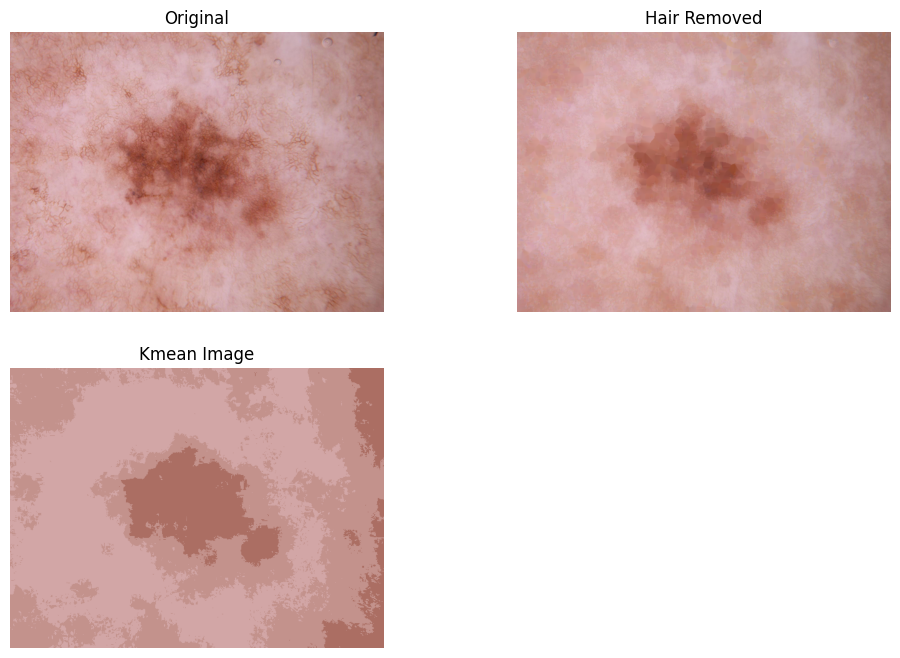

0


In [4]:
mode = 'train'

transforms_composer = Composer([
                                HairRemoval(),
                                ])

type_count1 = 0
dataloader = DataLoader(data_folder, mode)
for i, (img, label) in enumerate(dataloader):
    
    im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im_hist = cv2.calcHist([im_gray], [0], None, [256], [0, 256])
    
    cleaned_img = transforms_composer(img=img)
    kmeans_img = KMeansSegmentation(k=3)(cleaned_img)
    
    # Show the image and histogram in one line
    # matplotlib_visualizer.show_image_and_histogram(cleaned_img, im_hist, 
    #                                             image_title='Image', 
    #                                             hist_title='Histogram', 
    #                                             x_label='Bins', 
    #                                             y_label='Number of Pixels')
    
    matplotlib_visualizer.show_multiple_images([img, cleaned_img, kmeans_img], ['Original', 'Hair Removed', 'Kmean Image'])
    
    if i >= 10:
        break
print(type_count1)

## Object Centric Cropping